# 고혈압 분석 모델
## @author: sh22h

- year0_NA를 DataFrame으로 불러오고 4개로 나눔
  - binary: 범주형(binary) 변수, 0 / 1 로 변경
  - category: 범주형(>3) 변수, min-max-normalization
  - ctn:연속형 변수, 정규화, 표준화 
  - hyperTension: 고혈압

- 각각 정규화 또는 표준화한 후 변수는 X 고혈압은 Y로 둠
  - 정규화(normalization): 0, 1
  - 표준화(standardization): 평균: 0 표준편차: 1

## 학습 모델

- 1차
  - normalize_ctn
  ```
model = Sequential()
model.add(Dense(12, input_dim=52, activation='relu'))  # input layer requires input_dim param
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid instead of relu for final probability between 0 and 1
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))
```

- 2차
  - Decision Tree 구현

- 3차
  - 2021-07-29
  - 식사패턴과 고혈압의 상관 관계

In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/year0_NA.csv', index_col=0, na_values=['NA'])
df = dataset.dropna()  # 10000명 중 결측값 없는 사람만 추출 약 1000명
df

,AS1_SEX,AS1_AGE,AS1_JOBB,AS1_EDUA,AS1_INCOME,AS1_DRINK,AS1_DRDUA,AS1_TOTALC,AS1_SMOKEA,AS1_HVSMAM,AS1_HVSMDU,AS1_PHYSTB,AS1_PHYSIT,AS1_PHYACTL,AS1_PHYACTM,AS1_PHYACTH,AS1_INSUR,AS1_HEALTH,AS0_TIED,AS1_SLPAMTM,AS0_SLPAMSF,AS1_STRPHYSJ,AS1_RGMEALFQA,AS1_HEIGHT,AS1_WEIGHT,AS1_B01,AS1_B02,AS1_B03,AS1_B04,AS1_B05,AS1_B06,AS1_B07,AS1_B08,AS1_B09,AS1_B10,AS1_B11,AS1_B12,AS1_B13,AS1_B14,AS1_B15,AS1_B16,AS1_B17,AS1_B18,AS1_B19,AS1_B20,AS1_B21,AS1_B23,AS1_B24,P1,P2,P3,P4,HYPERTENSION
RID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EPI20_026_2_000009,1,47,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,1.0,2.0,3.0,1.0,7.0,1.0,1,3.0,155.0,60.0,2850,99,39,528,1045,1542,23,4569,970,4270,2,1,26,313,10,3,469,135,4879,30,13,27,264,800,443,836,45,0
EPI20_026_2_000032,1,69,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,8.0,4.0,0.0,0.0,3.0,4.0,0.0,4.0,1.0,0,3.0,161.0,83.0,1737,54,22,323,296,851,10,1532,361,2561,1,1,13,51,7,2,162,36,2062,19,7,7,107,15,12,745,17,1
EPI20_026_2_000043,1,45,1.0,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,8.0,6.0,0.0,0.0,2.0,4.0,0.0,9.0,1.0,0,3.0,151.0,49.0,1901,72,33,325,700,1286,12,2915,598,4047,1,1,15,104,8,2,316,136,2338,32,8,9,322,19,28,935,210,0
EPI20_026_2_000047,1,66,1.0,1.0,1.0,2.0,4.0,0.0,1.0,0.0,0.0,7.0,1.0,1.0,0.0,0.0,3.0,2.0,0.0,8.0,1.0,0,3.0,147.0,56.0,1205,30,6,250,164,476,5,1285,299,1696,1,0,8,65,5,1,161,10,1696,11,4,6,47,5,41,725,4,1
EPI20_026_2_000067,0,49,8.0,3.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,7.0,6.0,1.0,0.0,2.0,3.0,1.0,6.0,0.0,0,3.0,164.0,75.0,2501,104,53,397,668,1510,15,3246,549,3144,2,2,24,112,11,2,281,133,2454,21,7,11,471,73,100,805,178,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI20_026_2_010003,0,40,4.0,3.0,7.0,2.0,4.0,0.0,1.0,0.0,0.0,5.0,8.0,8.0,0.0,1.0,2.0,2.0,1.0,7.0,0.0,1,3.0,165.0,73.0,2264,81,36,403,557,1312,17,3772,665,3723,1,1,21,219,14,3,371,109,3015,27,11,15,243,26,71,930,212,0
EPI20_026_2_010014,0,47,4.0,5.0,5.0,1.0,0.0,0.0,3.0,15.0,24.0,3.0,8.0,3.0,0.0,0.0,2.0,4.0,1.0,6.0,1.0,1,3.0,166.0,72.0,2488,93,44,428,695,1410,16,3670,608,5135,2,1,23,232,11,3,344,107,2922,35,10,15,429,140,37,865,127,1
EPI20_026_2_010015,0,48,8.0,4.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,2.0,2.0,4.0,0.0,6.0,1.0,0,3.0,167.0,73.0,2044,77,37,347,609,1185,12,2739,477,2263,2,1,21,167,10,2,266,146,1887,15,5,13,195,237,70,821,340,0


In [4]:
'''
# 범주형(binary) 변수
binary = df.reindex(columns=['AS1_SEX', 'AS0_TIED', 'AS0_SLPAMSF', 'AS1_STRPHYSJ'])

# 범주형(3 이상) 변수
category = df.reindex(columns=['AS1_JOBB', 'AS1_EDUA', 'AS1_INCOME', 'AS1_DRINK',
                               'AS1_DRDUA', 'AS1_SMOKEA', 'AS1_PHYSTB', 'AS1_PHYSIT',
                               'AS1_PHYACTL', 'AS1_PHYACTM', 'AS1_PHYACTH', 'AS1_INSUR',
                               'AS1_HEALTH'
                               ])
category = (category - category.min()) / (category.max() - category.min())

# 연속형 변수
ctn = df.reindex(columns=['AS1_AGE', 'AS1_TOTALC', 'AS1_HVSMAM', 'AS1_HVSMDU',
                          'AS1_SLPAMTM', 'AS1_RGMEALFQA', 'AS1_HEIGHT', 'AS1_WEIGHT',
                          'AS1_B01', 'AS1_B02', 'AS1_B03', 'AS1_B04', 'AS1_B05',
                          'AS1_B06', 'AS1_B07', 'AS1_B08', 'AS1_B09', 'AS1_B10',
                          'AS1_B11', 'AS1_B12', 'AS1_B13', 'AS1_B14', 'AS1_B15',
                          'AS1_B16', 'AS1_B17', 'AS1_B18', 'AS1_B19', 'AS1_B20',
                          'AS1_B21', 'AS1_B23', 'AS1_B24', 'P1', 'P2', 'P3', 'P4'
                          ])
normalize_ctn = (ctn - ctn.min()) / (ctn.max() - ctn.min())  # min-max
'''

pattern = dataset.reindex(columns=['P1', 'P2', 'P3', 'P4'])
normalize_pattern = (pattern - pattern.min()) / (pattern.max() - pattern.min())
standarizied_pattern = pattern.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
normalize_pattern

,P1,P2,P3,P4
RID,,,,
EPI20_026_2_000001,0.010257,0.016996,0.198560,0.094295
EPI20_026_2_000002,0.008837,0.019026,0.151235,0.019802
EPI20_026_2_000003,0.001894,0.008625,0.177366,0.008958
EPI20_026_2_000004,0.110778,0.019026,0.151235,0.038661
EPI20_026_2_000005,0.074168,0.002537,0.220165,0.006601
...,...,...,...,...
EPI20_026_2_010026,0.004734,0.021563,0.139918,0.136728
EPI20_026_2_010027,0.003472,0.007610,0.151235,0.007072
EPI20_026_2_010028,0.000316,0.016743,0.150206,0.053748


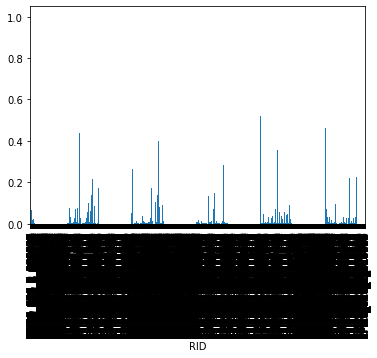

In [7]:
%matplotlib inline
normalize_pattern['P1'].plot(kind='bar')

In [9]:
# X = pd.concat([binary, category, normalize_ctn], axis=1)  # 고혈압을 제외한 나머지 변수
X = normalize_pattern
y = dataset['HYPERTENSION']  # 고혈압 변수

# 훈련 데이터 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8733, 4) (971, 4) (8733,) (971,)


In [ ]:
model = Sequential()
# model.add(Dense(120, input_dim=52, activation='relu'))  # input layer requires input_dim param
model.add(Dense(12, input_dim=4, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # sigmoid instead of relu for final probability between 0 and 1

# compile the model, adam gradient descent (optimized)
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

# call the function to fit to the data (training the network)
# verbose=0 는 프로그래스를 숨깁니다.
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
# print(history.history)

# 모델의 정확도를 계산합니다.
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

In [ ]:
fig, ax1 = plt.subplots()

# 모델의 오차를 그립니다.
ax1.plot(history.history['loss'])
ax1.set(title='model loss', xlabel='epoch', ylabel='loss')

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

In [ ]:
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

In [ ]:
importances = tree.feature_importances_
print("특성 중요도:\n{}".format(importances))

In [ ]:
tree_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (16,9)
tree_importances.plot.bar(ax=ax)
ax.set_title("HyperTension Feature Importance")
ax.set_ylabel("feature importance")